In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiment_2/results_with_prompt/experiment-f3_experiment_20250106_233730/experiment_log.csv"
df = pd.read_csv(log_file)
df.head(12)

,ratio,experiment_num,num_points,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,3,tensor(0.1075),tensor(0.0658),0.449721,tensor(0.8156),tensor(0.8739),0.676395
1,0.01,1,3,tensor(0.1110),tensor(0.0587),0.492211,tensor(0.8150),tensor(0.8770),0.666752
2,0.01,2,3,tensor(0.1179),tensor(0.0607),0.481223,tensor(0.8164),tensor(0.8791),0.675897
3,0.01,3,3,tensor(0.1079),tensor(0.0685),0.433318,tensor(0.8138),tensor(0.8740),0.655641
4,0.01,4,3,tensor(0.1191),tensor(0.0753),0.479549,tensor(0.8029),tensor(0.8407),0.662865
5,1.00,0,3,tensor(0.0077),tensor(0.0013),0.615818,tensor(0.9892),tensor(0.9955),0.862629
6,1.00,1,3,tensor(0.0076),tensor(0.0013),0.591966,tensor(0.9892),tensor(0.9955),0.861815
7,1.00,2,3,tensor(0.0079),tensor(0.0013),0.440366,tensor(0.9892),tensor(0.9955),0.859636
8,1.00,3,3,tensor(0.0078),tensor(0.0013),0.573253,tensor(0.9889),tensor(0.9955),0.852833
9,1.00,4,3,tensor(0.0079),tensor(0.0013),0.529572,tensor(0.9893),tensor(0.9955),0.866457


In [16]:
# Convertendo colunas tensor para float
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce')
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [17]:
df.head(12)

,ratio,experiment_num,num_points,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,3,0.1075,0.0658,0.449721,0.8156,0.8739,0.676395
1,0.01,1,3,0.1110,0.0587,0.492211,0.8150,0.8770,0.666752
2,0.01,2,3,0.1179,0.0607,0.481223,0.8164,0.8791,0.675897
3,0.01,3,3,0.1079,0.0685,0.433318,0.8138,0.8740,0.655641
4,0.01,4,3,0.1191,0.0753,0.479549,0.8029,0.8407,0.662865
5,1.00,0,3,0.0077,0.0013,0.615818,0.9892,0.9955,0.862629
6,1.00,1,3,0.0076,0.0013,0.591966,0.9892,0.9955,0.861815
7,1.00,2,3,0.0079,0.0013,0.440366,0.9892,0.9955,0.859636
8,1.00,3,3,0.0078,0.0013,0.573253,0.9889,0.9955,0.852833
9,1.00,4,3,0.0079,0.0013,0.529572,0.9893,0.9955,0.866457


In [18]:
# Agrupando por 'ratio' e calculando média e desvio padrão
grouped = df.groupby(['ratio'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando os nomes das colunas após o agrupamento
grouped.columns = ['ratio',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std']
        
# Exibindo o DataFrame resultante
grouped.head(12)

,ratio,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std
0,0.01,0.0658,0.006595,0.11268,0.005499,0.467204,0.024639,0.86894,0.015937,0.81274,0.005582,0.667510,0.008836
1,1.00,0.0013,0.000000,0.00778,0.000130,0.550195,0.069048,0.99550,0.000000,0.98916,0.000152,0.860674,0.005028


/tmp/ipykernel_1440663/1000557066.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


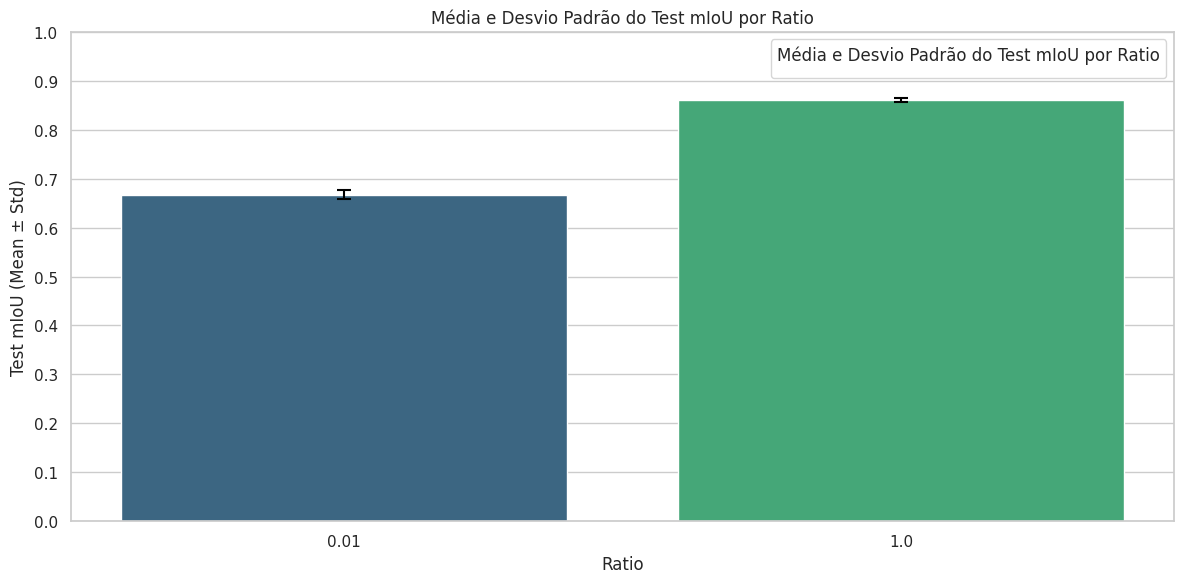

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurando o estilo
sns.set(style="whitegrid")

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando as médias com desvio padrão, agrupando por ratio
barplot = sns.barplot(
    data=grouped,
    x='ratio',  # Eixo X será o ratio
    y='test_mIoU_mean',  # Valores de média
    ci=None,  # Desativa o intervalo de confiança
    palette='viridis',  # Paleta de cores
    capsize=0.1,  # Tamanho das extremidades das barras de erro
    errwidth=1.5  # Largura das barras de erro
)

# Adicionando desvio padrão como linhas de erro
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()  # Altura (média)
    error = grouped.iloc[i]['test_mIoU_std']  # Desvio padrão correspondente
    barplot.errorbar(
        x=bar.get_x() + bar.get_width() / 2,  # Posição no eixo X
        y=height,  # Valor no eixo Y (média)
        yerr=error,  # Desvio padrão
        fmt='none',  # Formato para não exibir marcador
        color='black',  # Cor da linha de erro
        capsize=5,  # Tamanho das extremidades das barras de erro
        elinewidth=1.5,  # Largura da linha de erro
        capthick=1.5  # Espessura das extremidades
    )

# Ajustando a escala do eixo Y de 0 a 1, de 0.1 em 0.1
plt.ylim(0, 1)  # Limita os valores do eixo Y
plt.yticks(np.arange(0, 1.1, 0.1))  # Define os ticks do eixo Y de 0 a 1 com intervalo de 0.1

# Personalização do gráfico
plt.title('Média e Desvio Padrão do Test mIoU por Ratio')
plt.xlabel('Ratio')
plt.ylabel('Test mIoU (Mean ± Std)')
plt.legend(title='Média e Desvio Padrão do Test mIoU por Ratio')

# Exibindo o gráfico
plt.tight_layout()
plt.show()